# Solving Equations

In [2]:
from typing import Callable
import doctest

import numpy as np
import matplotlib.pyplot as plt

### Test functions

In [3]:
QUINTIC_SOLUTION = 1.1673039782614185

def quintic(x: float) -> float:
    return x ** 5 - x - 1


def quintic_derivative(x: float) -> float:
    return 5 * x ** 4 - 1


def quartic(x: float) -> float:
    return 16 * x ** 4 - 8 * x + 3


def quartic_derivative(x: float) -> float:
    return 64 * x ** 3 - 8


def cubic(x: float) -> float:
    return (x - 4) * (x - 1) * (x + 3)


def cubic_derivative(x: float) -> float:
    return 3 * x ** 2 - 4 * x - 11

### Equation solvers

Implement the functions below. The bisection method has been completed for you.

We want to investigate the convergence properties of each method, so in each function body we keep a list of every point visited, *e.g.*, for the bisection method, we add the new point `c` to the list at every step. Each function should return this sequence.

In [206]:
import pdb

def relative_error(a, b):
    return abs((b - a) / (b + a))

def rearrange(f:Callable[[float],float], a:float, tol: float)->[float]:
    sequence=[a]
    
    condition=True
    if f==quintic:
        while condition:
            b=np.power(a+1,1/5)
            
            if abs(b-a)<=tol:
                condition=False
            sequence.append(b)
            a=b
        
    elif f==quartic:
        while condition:
            b=np.power((8*a-3)/16,1/4)
            
            if abs(b-a)<=tol:
                condition=False
            sequence.append(b)
            a=b
            
    elif f==cubic:
        while condition:
            b=np.power(11*a+2*a**2-12,1/3)
            
            if abs(b-a)<=tol:
                condition=False
            sequence.append(b)
            a=b
            
    return sequence

def bisection(f: Callable[[float], float], a: float, b: float, tol: float) -> [float]:
    """
    Use the bisection method to find a zero of a function f on the bracket [a, b] to relative precision tol.
    
    >>> bisection(quintic, -1.0, 2.0, 1e-10)  #doctest: +ELLIPSIS
    [..., 1.16730397...]
    >>> bisection(cubic, 3.0, 5.0, 1e-10)
    [3.0, 5.0, 4.0]
    >>> bisection(quintic, 2.0, 3.0, 1e-10)
    Traceback (most recent call last):
    ValueError: [a, b] does not bracket a zero; f(a)*f(b) = 6931.0
    
    """
    fa, fb = f(a), f(b)

    if fa * fb >= 0:
        return [float('inf')]
        raise ValueError(f"[a, b] does not bracket a zero; f(a)*f(b) = {f(a)*f(b)}")
    
    sequence = [a, b]
    
    while relative_error(a, b) > tol:
        c = (a + b) / 2
        fc = f(c)
        if fc == 0:
            # if an exact solution is found, we should exit immediately
            sequence.append(c)
            return sequence
        
        a, b, fa, fb = (a, c, fa, fc) if fa * fc < 0.0 else (c, b, fc, fb)
        sequence.append(c)
        
    return sequence


def secant(f: Callable[[float], float], x0: float, x1: float, tol: float) -> [float]:
    """
    Use the secant method to find a zero of a function f close [x0, x1] to relative precision tol.

    >>> secant(quintic, 2.0, 3.0, 1e-10)  #doctest: +ELLIPSIS
    [..., 1.16730397...]
    
    """
    sequence=[x0,x1]
    
    while relative_error(x0,x1)>tol:
        x2=x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
        if f(x2)==0:
            sequence.append(x2)
            return sequence

        x0,x1=(x1,x2)
        sequence.append(x2)
        
        if len(sequence)>1000:
            break
    
    return sequence

    
    
def newton_raphson(f: Callable[[float], float], df: Callable[[float], float], x0: float, tol: float) -> float:
    """
    Use the Newton--Raphson method to find a zero of a function f close x0 to relative precision tol.

    >>> newton_raphson(quintic, quintic_derivative, 3.0, 1e-10)  #doctest: +ELLIPSIS
    [..., 1.16730397...]

    """    
    sequence=[x0] 
    x1=x0-f(x0)/df(x0)
    if f(x1)==0:
        sequence.append(x1)
        return sequence
    
    while relative_error(x0,x1)>tol:
        x2=x1-f(x1)/df(x1)
        if f(x2)==0:
            sequence.append(x2)
            return sequence
        
        x0,x1=(x1,x2)
        sequence.append(x2)
        
        if len(sequence)>100:
            break
        
    return sequence


def inverse_quadratic_interpolation(f: Callable[[float], float], a: float, b: float, c: float, tol: float) -> [float]:
    """
    Use the IQI method to find a zero of a function f close to the points [a, b, c] to relative precision tol.

    >>> inverse_quadratic_interpolation(quintic, -1.0, 2.0, 3.0, 1e-10)  #doctest: +ELLIPSIS
    [..., 1.16730397...]
    >>> inverse_quadratic_interpolation(cubic, -3.0, 1.0, 4.0, 1e-10)
    Traceback (most recent call last):
    ValueError: two or more points are collinear; f(a), f(b), f(c) = (0.0, -0.0, 0.0)
    
    """
    sequence=[a,b,c]
    
    if (f(b)-f(a))*(c-b)==(f(c)-f(b))**(b-a):
        raise ValueError(f"two or more points are collinear; f(a), f(b), f(c) = {(f(a), f(b), f(c))}")
    
    while relative_error(max(a,b,c),min(a,b,c))>tol:
        d=f(b)*f(c)/(f(a)-f(b))/(f(a)-f(c))*a+f(a)*f(c)/(f(b)-f(a))/(f(b)-f(c))*b+f(a)*f(b)/(f(c)-f(a))/(f(c)-f(b))*c
        if f(d)==0:
            sequence.append(d)
            return sequence
        
        a,b,c=(b,c,d)
        sequence.append(d)
        
    return sequence


doctest.testmod(verbose=True)

Trying:
    bisection(quintic, -1.0, 2.0, 1e-10)  #doctest: +ELLIPSIS
Expecting:
    [..., 1.16730397...]
ok
Trying:
    bisection(cubic, 3.0, 5.0, 1e-10)
Expecting:
    [3.0, 5.0, 4.0]
ok
Trying:
    bisection(quintic, 2.0, 3.0, 1e-10)
Expecting:
    Traceback (most recent call last):
    ValueError: [a, b] does not bracket a zero; f(a)*f(b) = 6931.0
**********************************************************************
File "__main__", line 47, in __main__.bisection
Failed example:
    bisection(quintic, 2.0, 3.0, 1e-10)
Expected:
    Traceback (most recent call last):
    ValueError: [a, b] does not bracket a zero; f(a)*f(b) = 6931.0
Got:
    [inf]
Trying:
    inverse_quadratic_interpolation(quintic, -1.0, 2.0, 3.0, 1e-10)  #doctest: +ELLIPSIS
Expecting:
    [..., 1.16730397...]
ok
Trying:
    inverse_quadratic_interpolation(cubic, -3.0, 1.0, 4.0, 1e-10)
Expecting:
    Traceback (most recent call last):
    ValueError: two or more points are collinear; f(a), f(b), f(c) = (0.0, -0.0,

TestResults(failed=1, attempted=7)

## Order estimation
The order of convergence of a sequence can be estimate from any four consecutive elements of the sequence using the heuristic,
\begin{equation}
    q \approx \frac{\log{\left|\frac{x_{k+1}-x_{k}}{x_{k}-x_{k-1}}\right|}}
    {\log{\left|\frac{x_{k}-x_{k-1}}{x_{k-1}-x_{k-2}}\right|}}
\end{equation}

On the same axes, plot the order estimate for the sequences generated by the bisection, secant, Newton--Raphson, and IQI methods for the solution of the quintic equation.

Choose as your starting point(s) values close to the solution (`QUINTIC_SOLUTION`). How do the estimated order values compare to the theoretical values?

Upload your plot. Remember to include a legend, label your axes, ... all the good stuff.


/var/folders/26/33gfkypd2f930_67mdqmxs8m0000gn/T/ipykernel_32614/1446941534.py:6: RuntimeWarning: divide by zero encountered in log
  q.append(np.log(abs((sequence[i]-sequence[i-1])/(sequence[i-1]-sequence[i-2])))/np.log(abs((sequence[i-1]-sequence[i-2])/(sequence[i-2]-sequence[i-3]))))


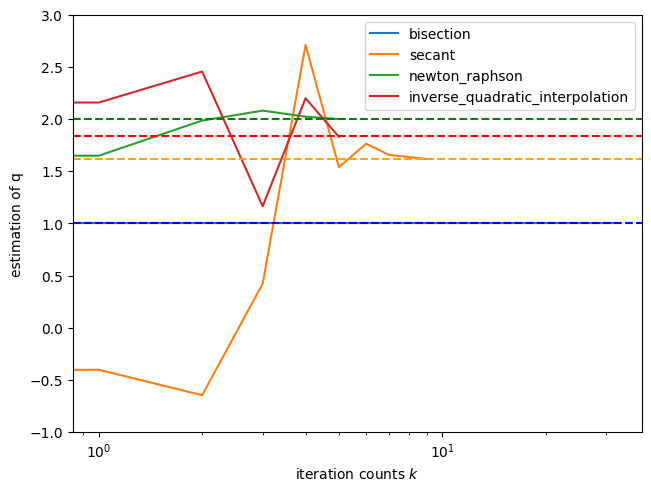

In [168]:
fig,ax=plt.subplots(1,1,constrained_layout=True)

def converg_order(sequence: [float]):
    q=[]
    for i in range(3,len(sequence)):
        q.append(np.log(abs((sequence[i]-sequence[i-1])/(sequence[i-1]-sequence[i-2])))/np.log(abs((sequence[i-1]-sequence[i-2])/(sequence[i-2]-sequence[i-3]))))
        
    return q

def converg_rate(sequence: [float]):
    mu=[]
    for i in range(1,len(sequence)-1):
        mu.append(abs(sequence[i]-sequence[-1])/abs(sequence[i-1]-sequence[-1]))
        
    return mu

ax.plot(converg_order(bisection(quintic,-1,2,1e-10)),label='bisection')
ax.plot(converg_order(secant(quintic,2,3,1e-10)),label='secant')
ax.plot(converg_order(newton_raphson(quintic,quintic_derivative,3,1e-10)),label='newton_raphson')
ax.plot(converg_order(inverse_quadratic_interpolation(quintic,0.8,1.1,1.35,1e-6)),label="inverse_quadratic_interpolation")

plt.axhline(y=1, color='b', linestyle='--')
plt.axhline(y=2, color='g', linestyle='--')
plt.axhline(y=(1+np.sqrt(5))/2, color='orange', linestyle='--')
plt.axhline(y=1.84, color='r', linestyle='--')


ax.set_ylim(-1,3)

ax.set_xlabel("iteration counts $k$")
ax.set_ylabel("estimation of q")
ax.set_xscale("log")

ax.legend()
plt.savefig("order_estimation1.png")


In [ ]:
inverse_quadratic_interpolation(quintic,-1,2,3,1e-10)

## Class exercises

We will complete the following exercises in Tuesday's class. 

## Newton--Raphson method---stuck in a rut
The Newton--Raphson method has a great theoretical order of convergence ($q=2$) in the general case, but fails under certain circumstances.

Plot the number of iterations required for convergence as a function of the starting point, $x_{0}$, for $x_{0}\in[-2,2]$.

For $x_0$ in what subset of $[-2,2]$ does the Newton--Raphson method converge reliably to the zero of the quintic?

What happens when the method fails to converge?

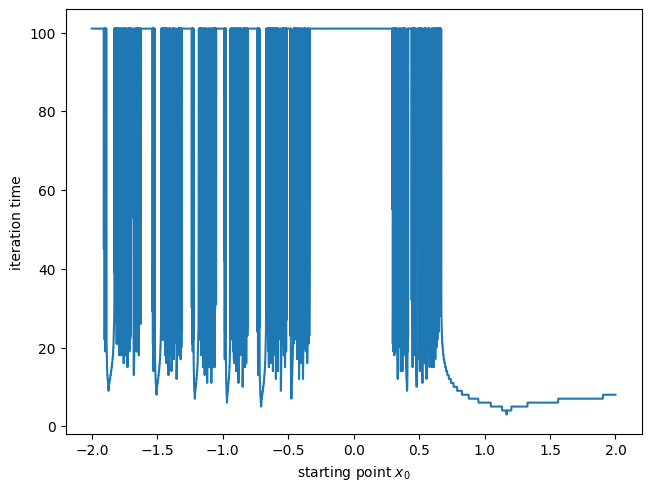

In [228]:
x0=np.linspace(-2,2,5000)

steps=[]

for x in x0:
    steps.append(len(newton_raphson(quintic,quintic_derivative,x,1e-10)))
    
fig,ax=plt.subplots(1,1,constrained_layout=True)
ax.plot(x0,steps)
ax.set_xlabel("starting point $x_0$")
ax.set_ylabel("iteration time")
plt.savefig("stuck_in_a_rut")

In [ ]:
newton_raphson(quintic,quintic_derivative,-1.9,1e-10)

## Secant method---false convergence
Using a convergence tolerance `tol=1e-8`, plot the solution of the quintic equation provided by the secant method for $x_{0}\in[-4.5,3.5]; \quad x_{1}=x_{0}+1.0$.

For what range of $x_{0}$ does the secant method reliably converge to the solution of the quintic equation?

What happens when the method fails to converge?

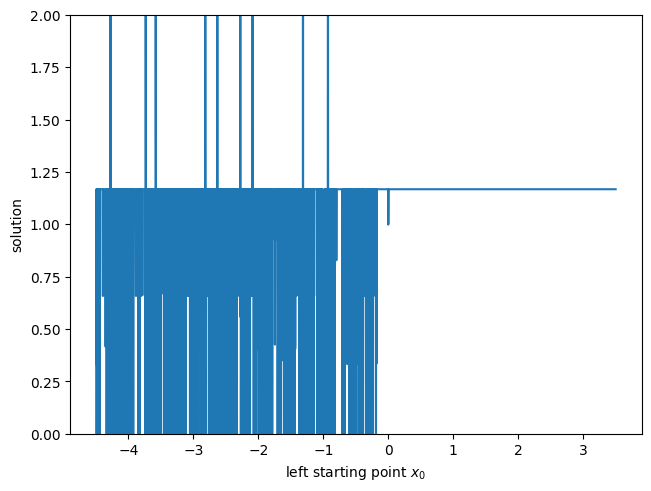

In [182]:
x0=np.linspace(-4.5,3.5,5000)

roots=[]

for x in x0:
    roots.append(secant(quintic,x,x+1,1e-8)[-1])
    
fig,ax=plt.subplots(1,1,constrained_layout=True)
ax.plot(x0,roots)
ax.set_ylim(0,2)
ax.set_xlabel("left starting point $x_0$")
ax.set_ylabel("solution")
plt.savefig("false_convergence")

In [152]:
len(rearrange(quartic,0.5,1e-8))

2

## Orders of Convergence---theory breaks down?
Using the rearrangement method and the Newton--Raphson method, plot the estimated order of convergence when solving the cubic, quartic, and quintic equations.

Is the observed order always the same as the theoretical order? When they differ, why do they differ?

Plot the rate of convergence assuming $q=1$. What do you notice?

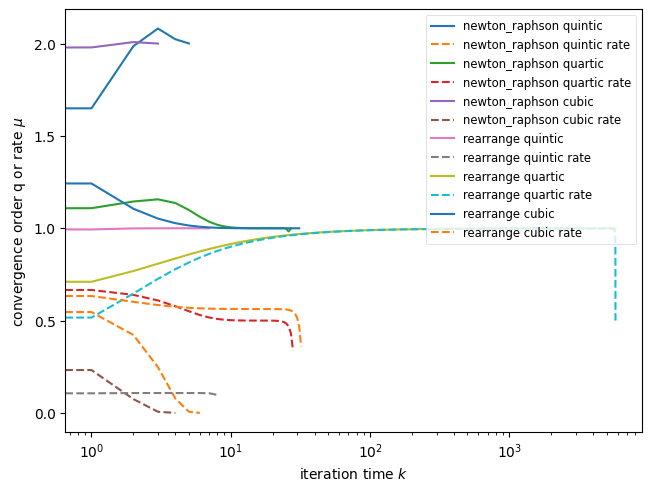

In [181]:
fig,ax=plt.subplots(1,1,constrained_layout=True)

FUNCTION=[
    quintic,
    quartic,
    cubic
]

DERIVATIVE=[
    quintic_derivative,
    quartic_derivative,
    cubic_derivative
]

for i in range(len(FUNCTION)):
    ax.plot(converg_order(newton_raphson(FUNCTION[i],DERIVATIVE[i],3,1e-8)),label='newton_raphson '+FUNCTION[i].__name__)
    ax.plot(converg_rate(newton_raphson(FUNCTION[i],DERIVATIVE[i],3,1e-8)),linestyle="--",label='newton_raphson '+FUNCTION[i].__name__+' rate')
    
for j in range(len(FUNCTION)):
    ax.plot(converg_order(rearrange(FUNCTION[j],2,1e-8)),label='rearrange '+FUNCTION[j].__name__)
    ax.plot(converg_rate(rearrange(FUNCTION[j],2,1e-8)),linestyle="--",label='rearrange '+FUNCTION[j].__name__+' rate')
    
ax.legend()
legend = plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')
legend.get_frame().set_linewidth(0.5)

ax.set_xscale("log")
ax.set_xlabel("iteration time $k$")
ax.set_ylabel("convergence order q or rate $\mu$")
plt.savefig("theory_breaks_down.png")

## Basins of Attraction
The solution to which a method will converge will depend on the initial point(s).

For the cubic equation, plot the solution arrived at by the Newton--Raphson method starting a point $x_{0}\in[-6,6]$.

Is the solution always the one closest to the initial point?

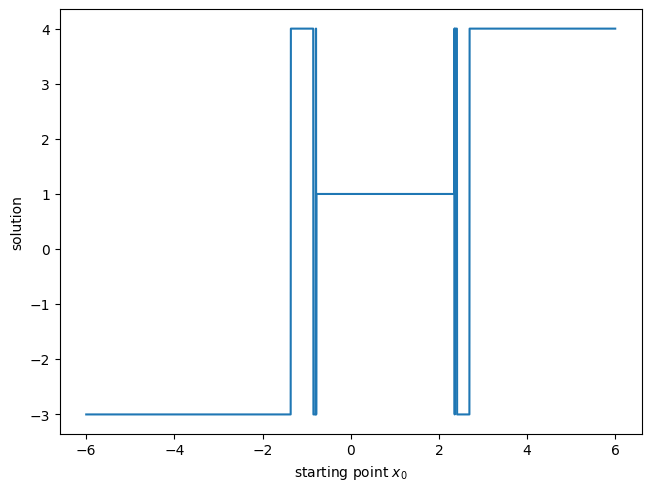

In [185]:
x0=np.linspace(-6,6,5000)

roots=[]

for x in x0:
    roots.append(newton_raphson(cubic,cubic_derivative,x,1e-8)[-1])
    
fig,ax=plt.subplots(1,1,constrained_layout=True)
ax.plot(x0,roots)
ax.set_xlabel("starting point $x_0$")
ax.set_ylabel("solution")

plt.savefig("basins_of_attraction1.png")

Do the same for the bisection, secant, and IQI methods. Your plot must now be a 2D plot.

Choose $x_{0}, x_{1} \in [-6,6]$. For the IQI method, choose $x_{2}=\frac{x_{0}+x_{1}}{2}$.

Use the axes method `pcolor` to make the plot.

/var/folders/26/33gfkypd2f930_67mdqmxs8m0000gn/T/ipykernel_32614/3384922368.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return abs((b - a) / (b + a))
/var/folders/26/33gfkypd2f930_67mdqmxs8m0000gn/T/ipykernel_32614/3384922368.py:142: RuntimeWarning: invalid value encountered in scalar power
  if (f(b)-f(a))*(c-b)==(f(c)-f(b))**(b-a):
/var/folders/26/33gfkypd2f930_67mdqmxs8m0000gn/T/ipykernel_32614/3384922368.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  d=f(b)*f(c)/(f(a)-f(b))/(f(a)-f(c))*a+f(a)*f(c)/(f(b)-f(a))/(f(b)-f(c))*b+f(a)*f(b)/(f(c)-f(a))/(f(c)-f(b))*c
/var/folders/26/33gfkypd2f930_67mdqmxs8m0000gn/T/ipykernel_32614/3384922368.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return abs((b - a) / (b + a))


TypeError: Colorbar.__init__() got an unexpected keyword argument 'vmin'

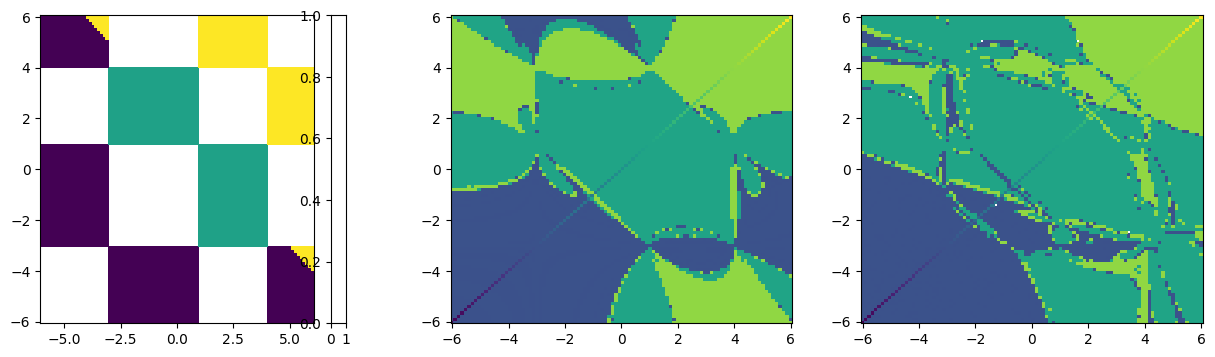

In [234]:
x0=np.linspace(-6,6,100)
x1=np.linspace(-6,6,100)

x0_grid, x1_grid = np.meshgrid(x0, x1)

def solution_bisection(f: Callable[[float],float],x0:float,x1:float,tol)->float:
    return bisection(f,x0,x1,tol)[-1]

def solution_secant(f: Callable[[float],float],x0:float,x1:float,tol)->float:
    return secant(f,x0,x1,tol)[-1]

def solution_iqi(f: Callable[[float],float],x0:float,x1:float,tol)->float:
    return inverse_quadratic_interpolation(f,x0,x1,(x0+x1)/2,tol)[-1]

#zb_grid=solution_bisection(cubic,x0_grid,x1_grid,1e-8)[-1]
#zs_grid=solution_secant(cubic,x0,x1,1e-8)[-1]
#zi_grid=solution_iqi(cubic,x0,x1,1e-8)[-1]

zb_grid=np.zeros_like(x0_grid)
zs_grid=np.zeros_like(x0_grid)
zi_grid=np.zeros_like(x0_grid)

tol=1e-8

for i in range(x0_grid.shape[0]):
    for j in range(x0_grid.shape[1]):
        zb_grid[i,j]=solution_bisection(cubic,x0_grid[i,j],x1_grid[i,j],tol)
        zs_grid[i,j]=solution_secant(cubic,x0_grid[i,j],x1_grid[i,j],tol)
        zi_grid[i,j]=solution_iqi(cubic,x0_grid[i,j],x1_grid[i,j],tol)


fig,axs=plt.subplots(1,3,figsize=(15,4))
im1=axs[0].pcolor(x0_grid, x1_grid, zb_grid,vmin=-6,vmax=6)
im2=axs[1].pcolor(x0_grid, x1_grid, zs_grid,vmin=-6,vmax=6)
im3=axs[2].pcolor(x0_grid, x1_grid, zi_grid,vmin=-6,vmax=6)

vmin = np.min([zb_grid, zs_grid, zi_grid])
vmax = np.max([zb_grid, zs_grid, zi_grid])  

fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
fig.colorbar(im3, ax=axs[2])

axs[0].set_title('bisection')
axs[0].set_xlabel('$x_0$')
axs[0].set_ylabel('$x_1$')

axs[1].set_title('secant')
axs[1].set_xlabel('$x_0$')
axs[1].set_ylabel('$x_1$')

axs[2].set_title('iqi')
axs[2].set_xlabel('$x_0$')
axs[2].set_ylabel('$x_1$')

plt.savefig("basins_of_attraction2")

In [227]:
solution_bisection(cubic,-2,-4,1e-8)

-3.0